In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

In [2]:
loan = pd.read_csv("loan_prediction.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan.drop(columns=["Loan_ID"], inplace=True)

In [4]:
print(loan.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [7]:
#mode for nan values use in categorical columns that represents the value that appears most often in the column
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

C:\Users\parsa\AppData\Local\Temp\ipykernel_10008\2476182949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
C:\Users\parsa\AppData\Local\Temp\ipykernel_10008\2476182949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [8]:
#distribution of the loan status column

loan_status_count = loan['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, 
                         names=loan_status_count.index, 
                         title='Loan Approval Status')
fig_loan_status.show()

In [9]:
# distribution of the gender column
gender_count = loan['Gender'].value_counts()
fig_gender = px.bar(gender_count, 
                    x=gender_count.index, 
                    y=gender_count.values, 
                    title='Gender Distribution')
fig_gender.show()

In [10]:
# distribution of the martial status column
married_count = loan['Married'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.show()

In [11]:
# distribution of the education column
education_count = loan['Education'].value_counts()
fig_education = px.bar(education_count, 
                       x=education_count.index, 
                       y=education_count.values, 
                       title='Education Distribution')
fig_education.show()

In [12]:
# distribution of the self-employment column
self_employed_count = loan['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count, 
                           x=self_employed_count.index, 
                           y=self_employed_count.values, 
                           title='Self-Employment Distribution')
fig_self_employed.show()


In [13]:
# distribution of the Applicant Income column
fig_applicant_income = px.histogram(loan, x='ApplicantIncome', 
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

In [14]:
# relationship between the income of the loan applicant and the loan status
fig_income = px.box(loan, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [15]:
# Calculate the IQR
Q1 = loan['ApplicantIncome'].quantile(0.25)
Q3 = loan['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

loan['ApplicantIncome'] = np.where((loan['ApplicantIncome'] < lower_bound) | (loan['ApplicantIncome'] > upper_bound),loan['ApplicantIncome'].mean(), loan['ApplicantIncome'])

In [16]:
# relationship between the income of the loan co-applicant and the loan status
fig_coapplicant_income = px.box(loan, x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [17]:
# Calculate the IQR
Q1 = loan['CoapplicantIncome'].quantile(0.25)
Q3 = loan['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

loan['CoapplicantIncome'] = np.where((loan['CoapplicantIncome'] < lower_bound) | (loan['CoapplicantIncome'] > upper_bound),loan['CoapplicantIncome'].mean(), loan['CoapplicantIncome'])

In [18]:
# relationship between the loan amount and the loan status
fig_loan_amount = px.box(loan, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

In [19]:
# relationship between credit history and loan status
fig_credit_history = px.histogram(loan, x='Credit_History', color='Loan_Status', 
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')
fig_credit_history.show()

In [20]:
# relationship between the property area and the loan status
fig_property_area = px.histogram(loan, x='Property_Area', color='Loan_Status', 
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

In [21]:
train, val, test =np.split(loan.sample(frac=1), [int(0.7*len(loan)), int(0.85*len(loan))])
print(len(train))
print(len(val))
print(len(test))

429
92
93


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning:

'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.



In [22]:
# this cell just for convert categorical to numeric(maping)
# from figure out the number of each Variable
# just for dataset
counts1 = loan["Gender"].value_counts()
counts2 = loan["Married"].value_counts()
counts3 = loan["Dependents"].value_counts()
counts4 = loan["Education"].value_counts()
counts5 = loan["Self_Employed"].value_counts()
counts6 = loan["Property_Area"].value_counts()
counts7 = loan["Loan_Status"].value_counts()
print(counts1)
print(counts2)
print(counts3)
print(counts4)
print(counts5)
print(counts6)
print(counts7)

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [22]:
def numeric (num):

  num["Gender"] = (num["Gender"] == "Male").astype(int)
  num["Married"] = (num["Married"] == "Yes").astype(int)
  num["Education"] = (num["Education"] == "Graduate").astype(int)
  num["Self_Employed"] = (num["Self_Employed"] == "No").astype(int)
  num["Loan_Status"] = (num["Loan_Status"] == "Y").astype(int)
  num["Property_Area"] = num["Property_Area"].map({"Semiurban":3,"Urban":2,"Rural":1})
  num["Dependents"] = num["Dependents"].map({"0":4,"1":3,"2":2,"3+":1})

  return num

In [23]:
train = numeric(train)
test = numeric(test)
val = numeric(val)

In [24]:
def scale_dataset(scale):
  x = scale.drop('Loan_Status', axis=1)
  y =scale['Loan_Status']

  return x, y

In [25]:
x_train, y_train = scale_dataset(train)
x_test, y_test = scale_dataset(test)
x_val, y_val = scale_dataset(val)


In [26]:
def scaler (sc):
   scaler = StandardScaler()
   sc = scaler.fit_transform(sc)

   return sc

In [28]:
x_train = scaler(x_train)

In [29]:
x_test = scaler(x_test)

# Model

In [44]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy1:.3f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.839
              precision    recall  f1-score   support

           0       0.81      0.52      0.63        25
           1       0.84      0.96      0.90        68

    accuracy                           0.84        93
   macro avg       0.83      0.74      0.77        93
weighted avg       0.84      0.84      0.83        93



# DecisionTree

In [46]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy2 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy2:.3f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.731
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        25
           1       0.81      0.82      0.82        68

    accuracy                           0.73        93
   macro avg       0.66      0.65      0.65        93
weighted avg       0.73      0.73      0.73        93



# SVM

In [47]:
model = SVC(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

accuracy3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy3:.3f}')
print(classification_report(y_test, y_pred))

[1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.860
              precision    recall  f1-score   support

           0       0.93      0.52      0.67        25
           1       0.85      0.99      0.91        68

    accuracy                           0.86        93
   macro avg       0.89      0.75      0.79        93
weighted avg       0.87      0.86      0.85        93



# KNN

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

accuracy4 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy4:.3f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.828
              precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.84      0.94      0.89        68

    accuracy                           0.83        93
   macro avg       0.80      0.73      0.75        93
weighted avg       0.82      0.83      0.82        93



# Log Regression


In [50]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

y_pred = lg_model.predict(x_test)

accuracy5 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy5:.3f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.871
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.85      1.00      0.92        68

    accuracy                           0.87        93
   macro avg       0.93      0.76      0.80        93
weighted avg       0.89      0.87      0.86        93



# Neural Net


In [51]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [52]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(11,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



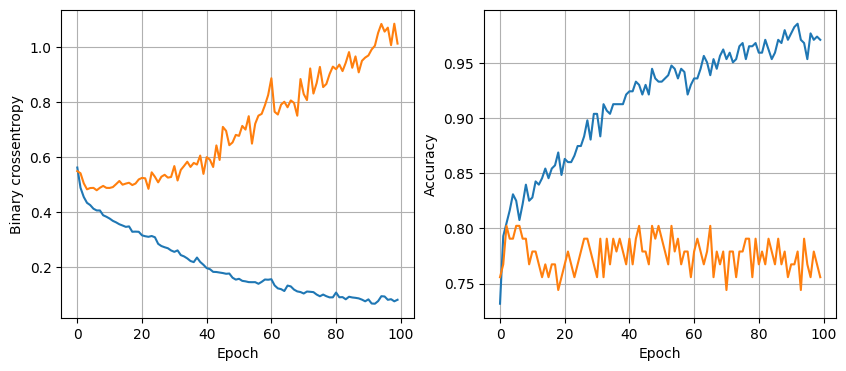

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6720 - loss: 3797.3960 
16 nodes, dropout 0, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



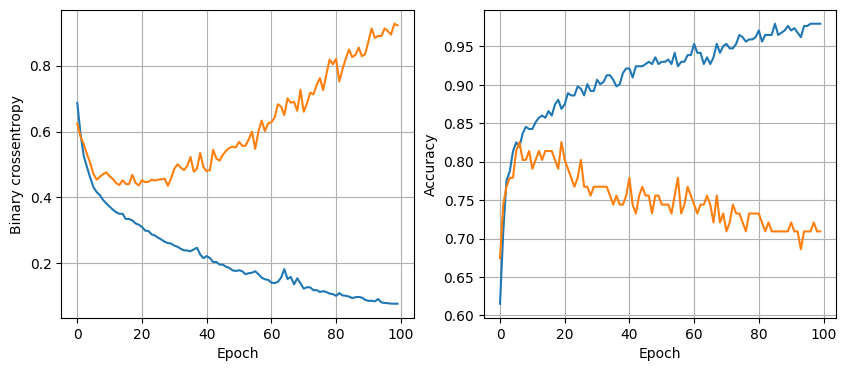

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5584 - loss: 1492.6106 
16 nodes, dropout 0, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



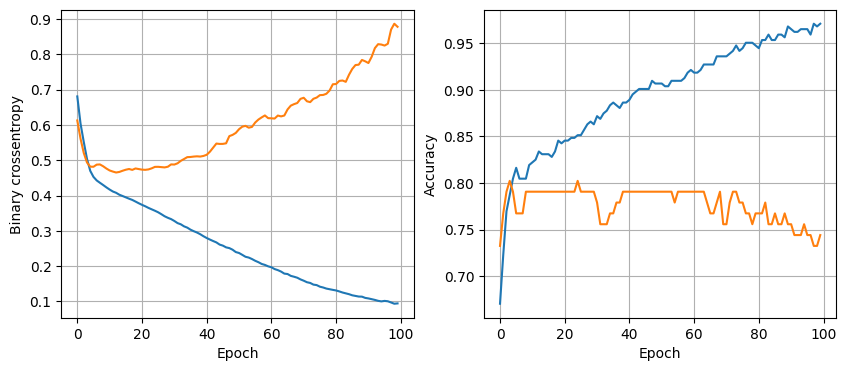

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 2065.1394 
16 nodes, dropout 0, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



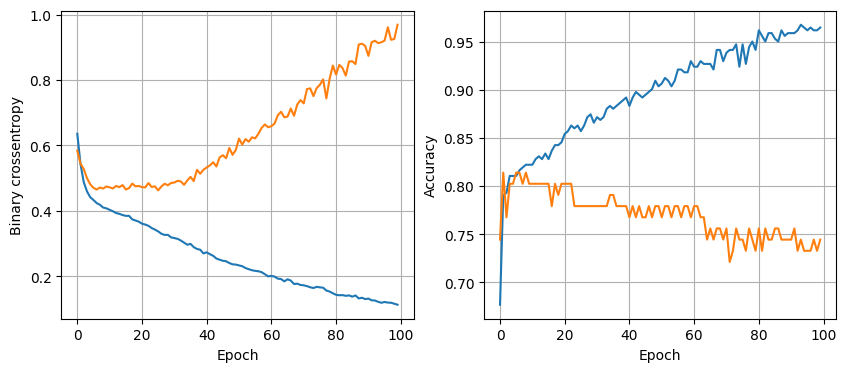

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6720 - loss: 1682.3011 
16 nodes, dropout 0, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



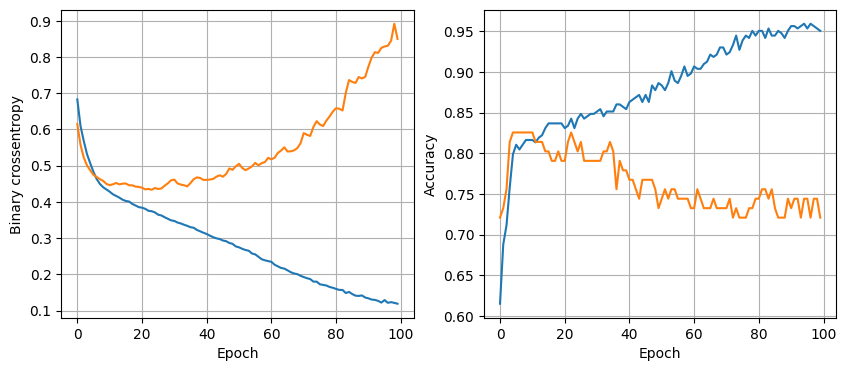

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 321.7105 
16 nodes, dropout 0, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



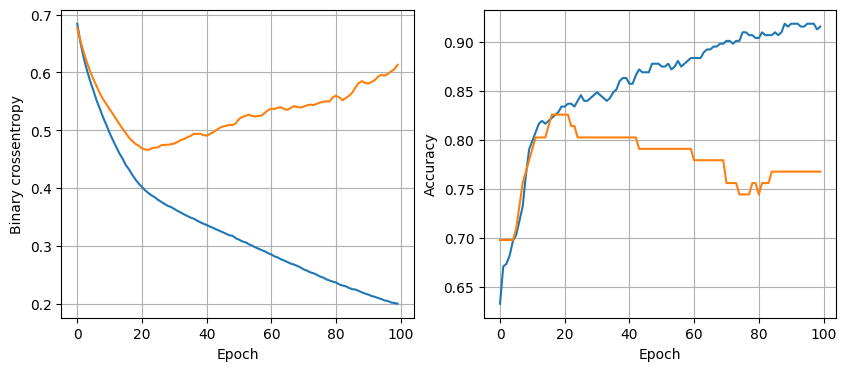

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3280 - loss: 2215.3215  
16 nodes, dropout 0, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



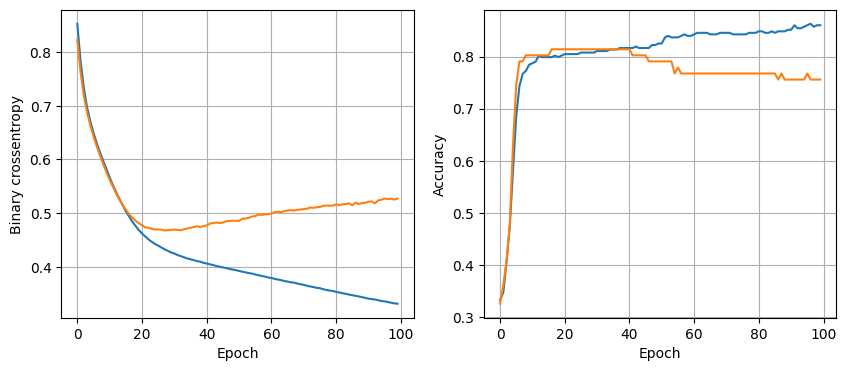

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3809 - loss: 358.6155 
16 nodes, dropout 0, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



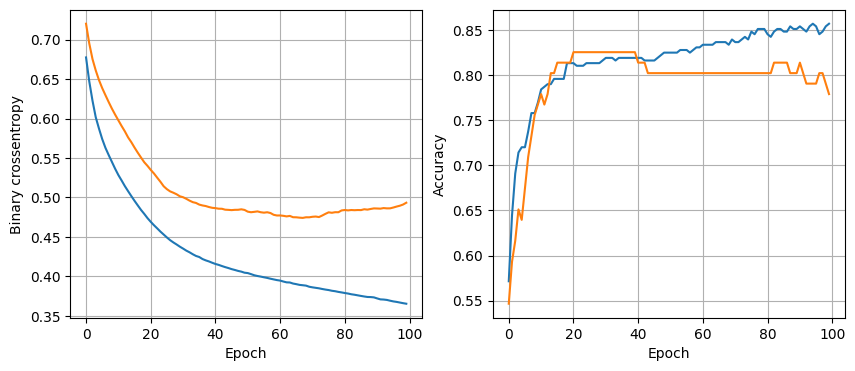

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4502 - loss: 320.0223  
16 nodes, dropout 0, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



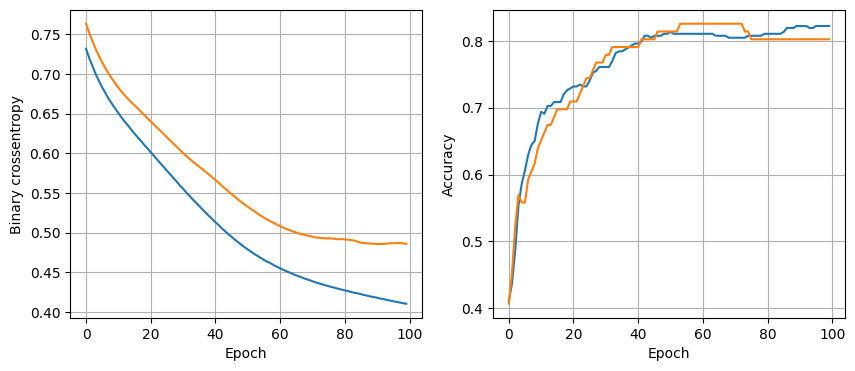

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6720 - loss: 352.8782 
16 nodes, dropout 0.2, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



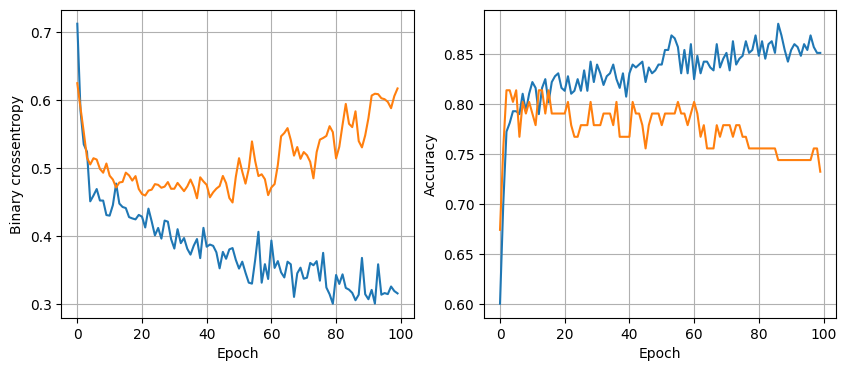

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1800.3679 
16 nodes, dropout 0.2, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



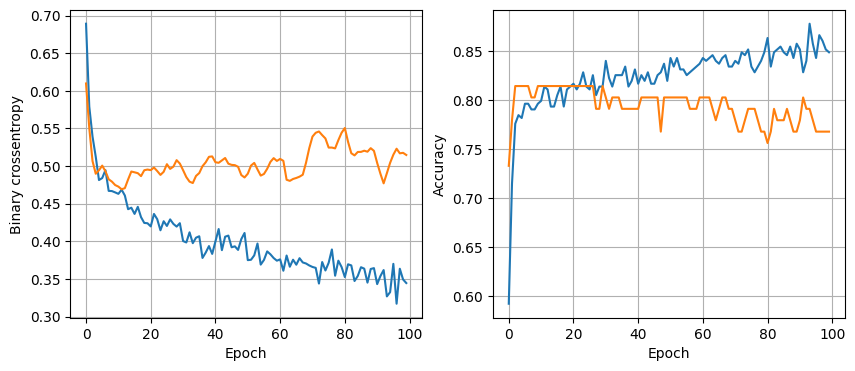

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 454.3326 
16 nodes, dropout 0.2, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



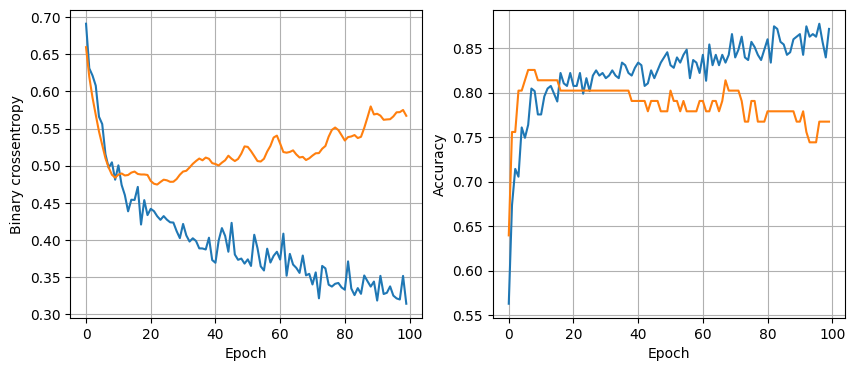

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 2467.0667 
16 nodes, dropout 0.2, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



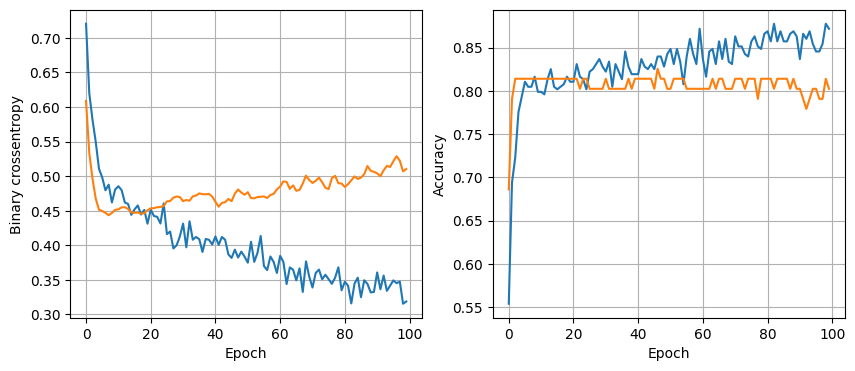

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 3448.9995 
16 nodes, dropout 0.2, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



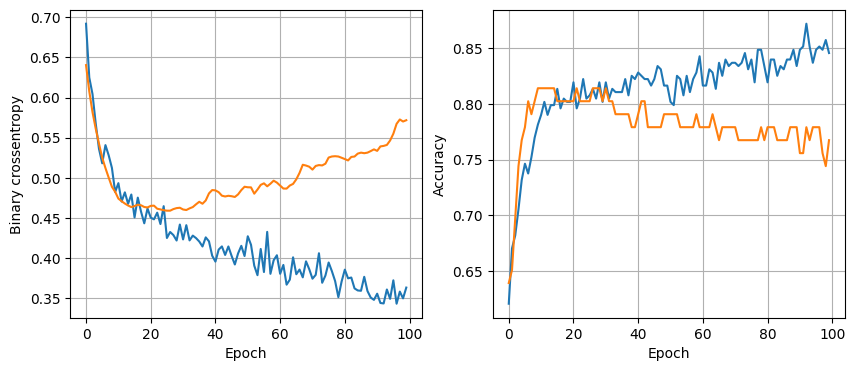

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4596 - loss: 723.3623 
16 nodes, dropout 0.2, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



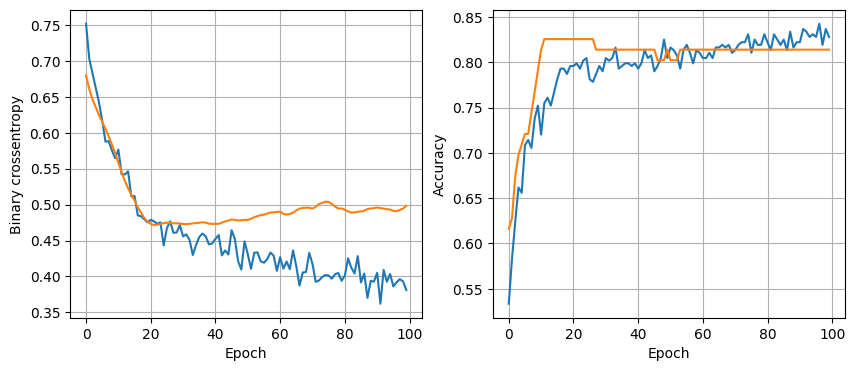

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4105 - loss: 747.0015 
16 nodes, dropout 0.2, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



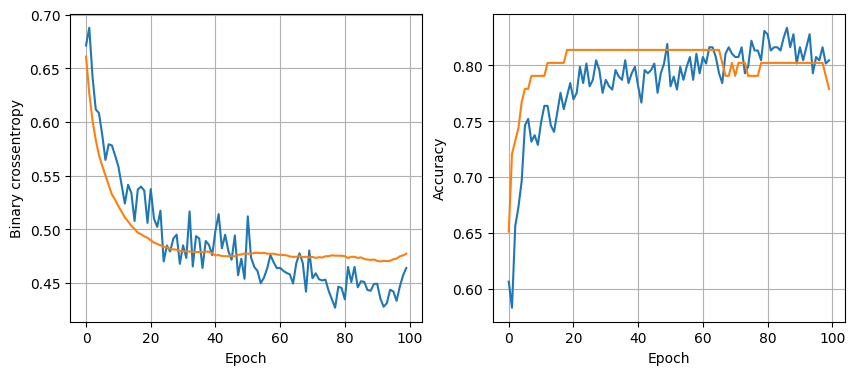

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5039 - loss: 196.7119 
16 nodes, dropout 0.2, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



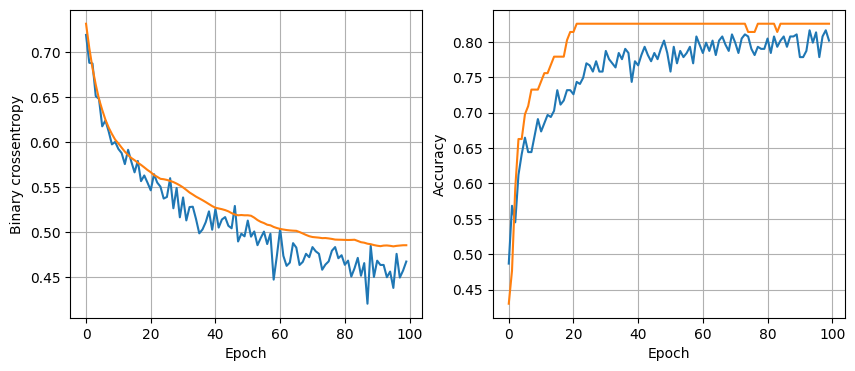

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 529.5764 
16 nodes, dropout 0.2, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



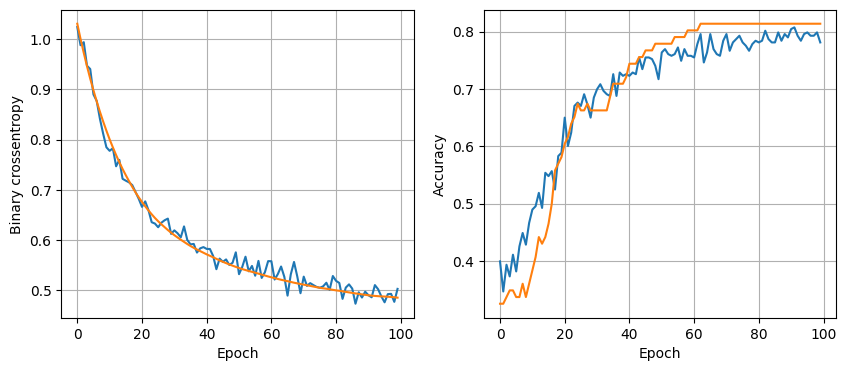

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 467.8389 
32 nodes, dropout 0, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



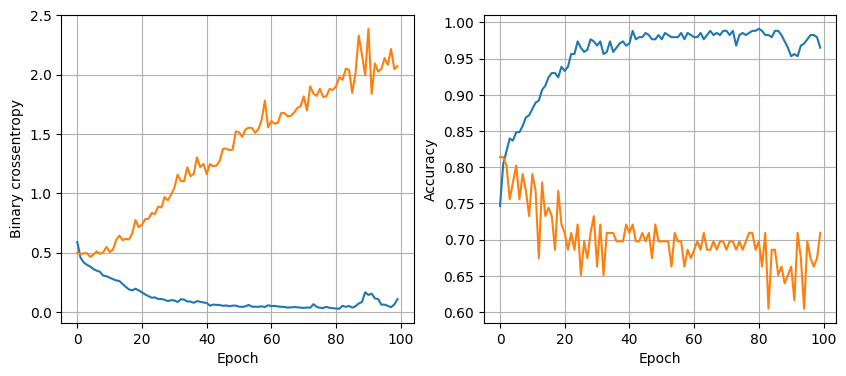

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 6067.8691 
32 nodes, dropout 0, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



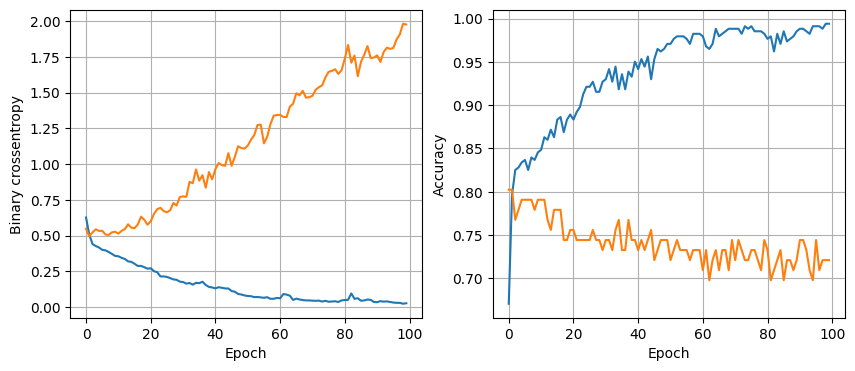

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - loss: 3902.1602 
32 nodes, dropout 0, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



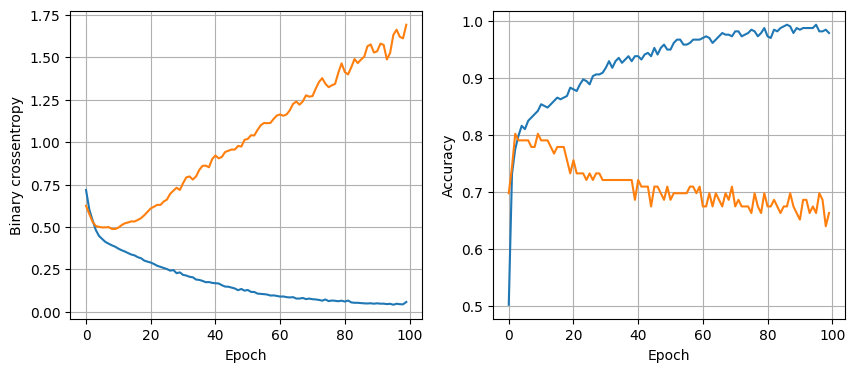

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5117 - loss: 1204.9573
32 nodes, dropout 0, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



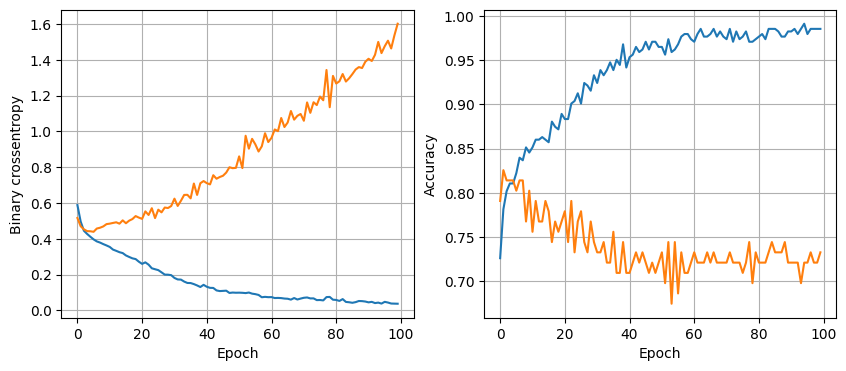

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 2383.5635 
32 nodes, dropout 0, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



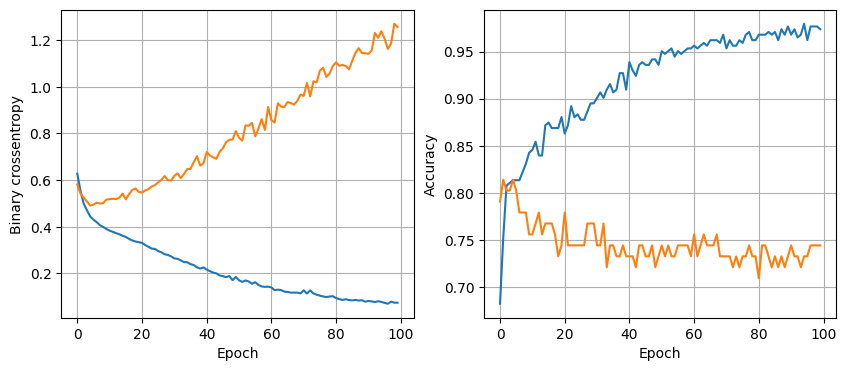

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 4118.4766 
32 nodes, dropout 0, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



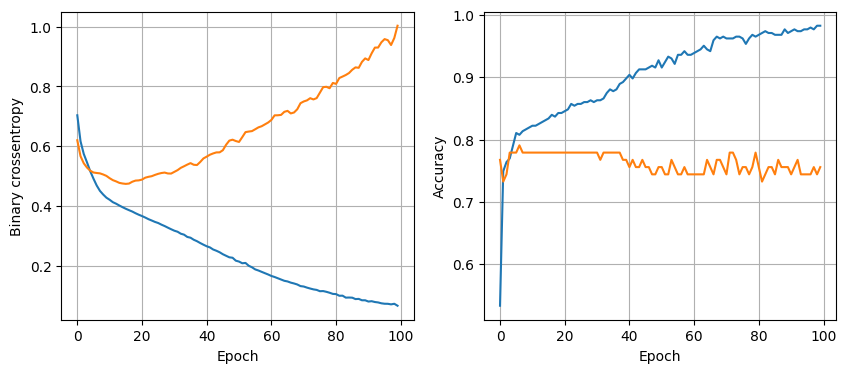

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4969 - loss: 1116.5244
32 nodes, dropout 0, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



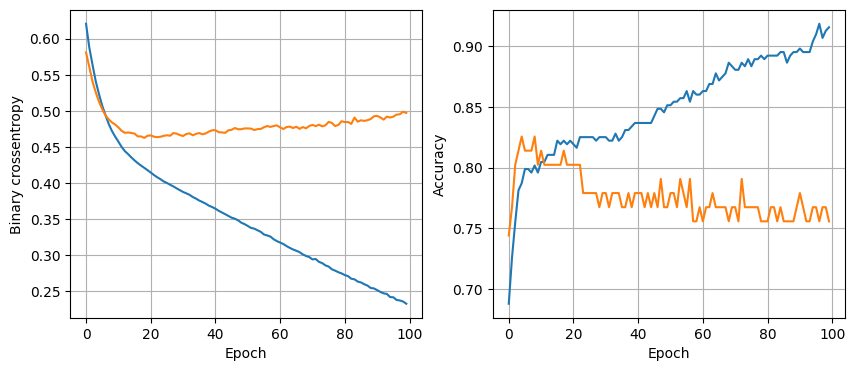

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4581 - loss: 327.5215 
32 nodes, dropout 0, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



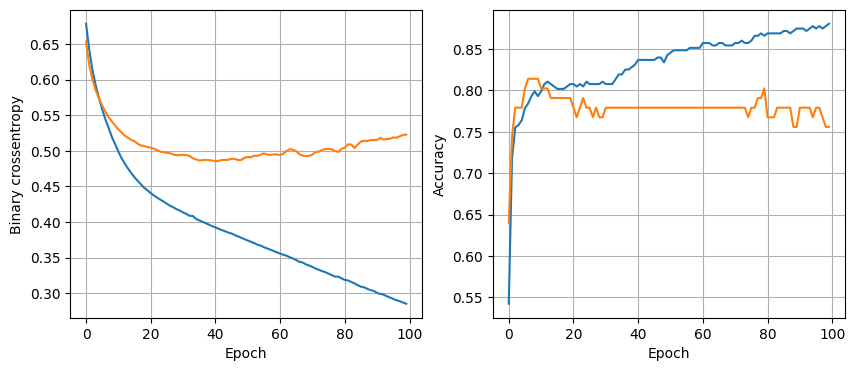

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6503 - loss: 218.5337 
32 nodes, dropout 0, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



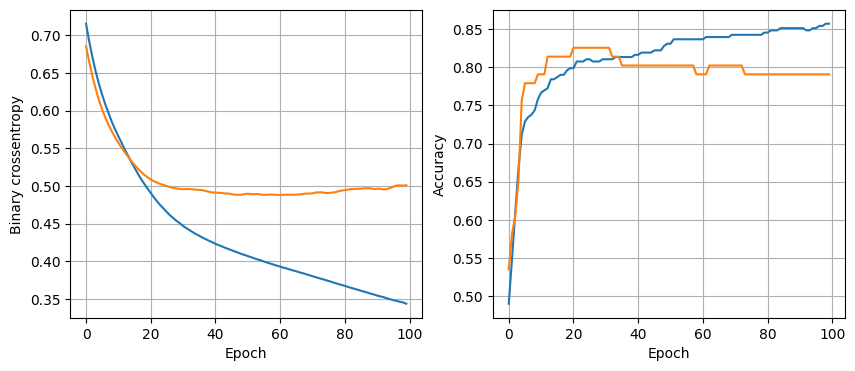

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5584 - loss: 336.9576 
32 nodes, dropout 0.2, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



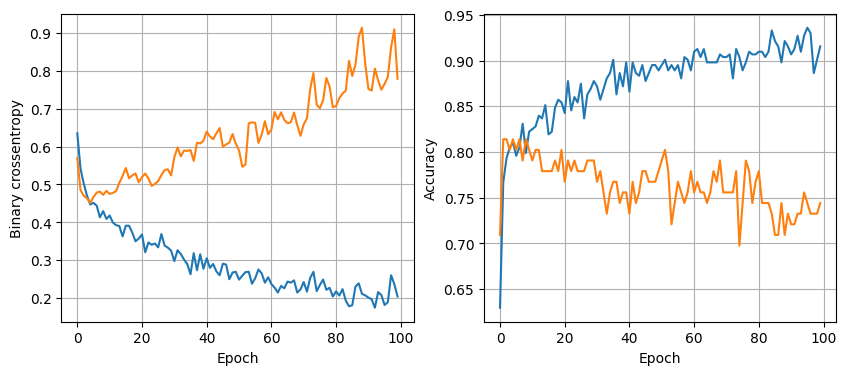

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.6720 - loss: 832.7372
32 nodes, dropout 0.2, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



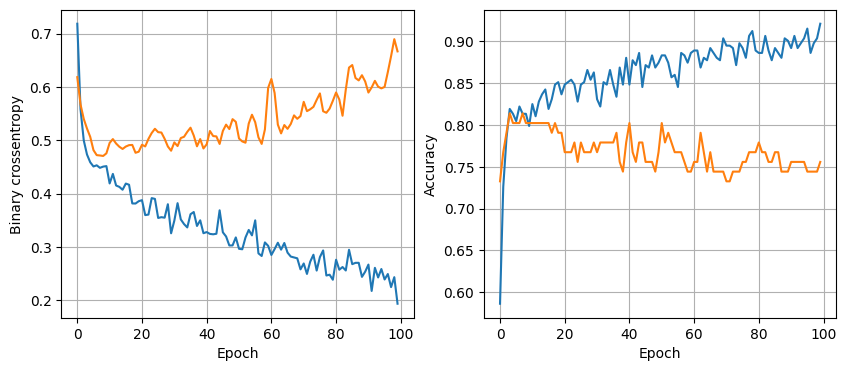

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5117 - loss: 1543.7349 
32 nodes, dropout 0.2, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



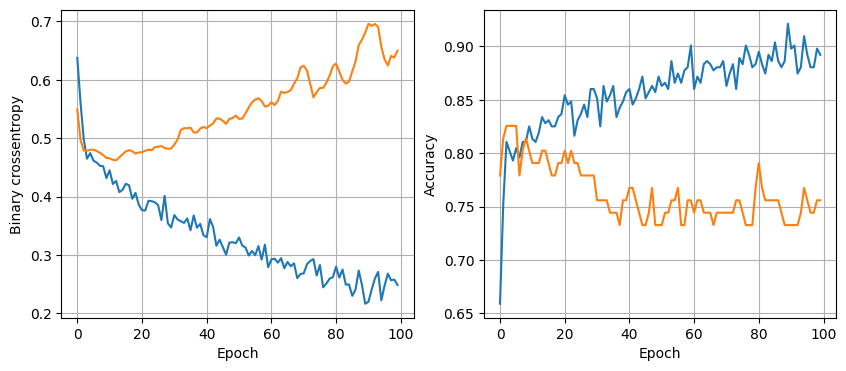

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1858.5055 
32 nodes, dropout 0.2, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



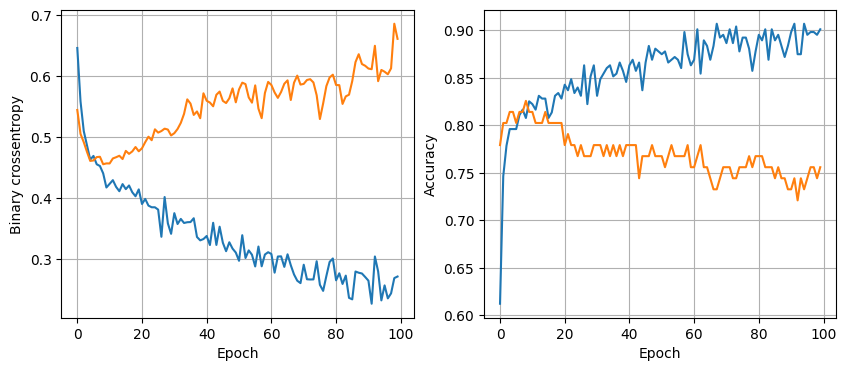

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1807.8420 
32 nodes, dropout 0.2, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



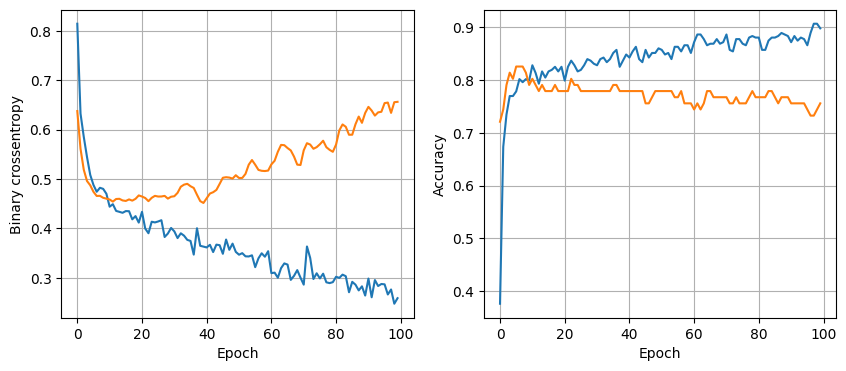

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6720 - loss: 79.5192 
32 nodes, dropout 0.2, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



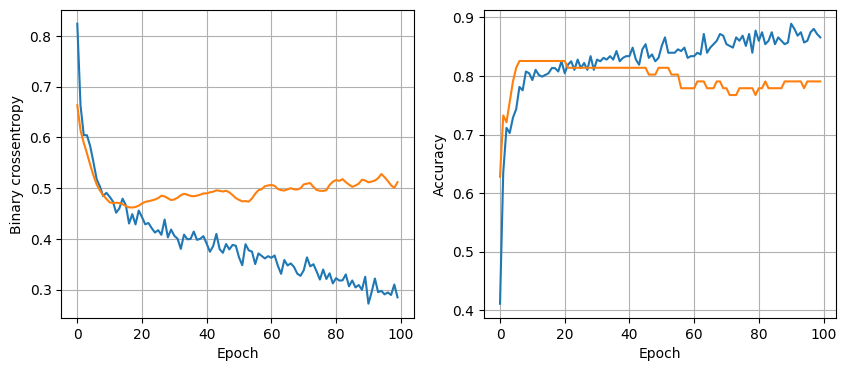

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3373 - loss: 1164.3973
32 nodes, dropout 0.2, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



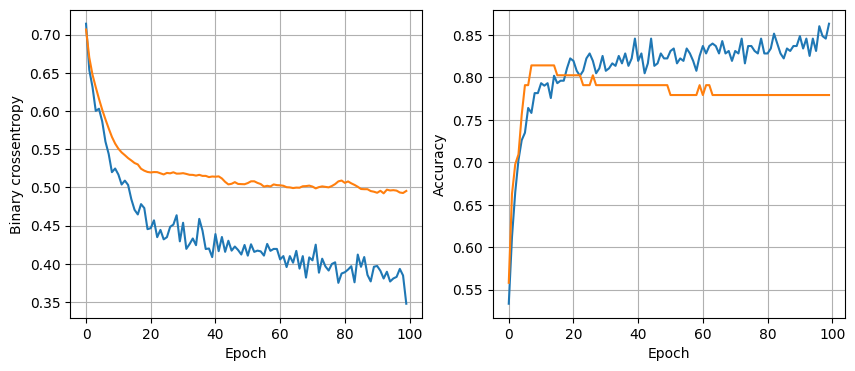

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3747 - loss: 541.1072 
32 nodes, dropout 0.2, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



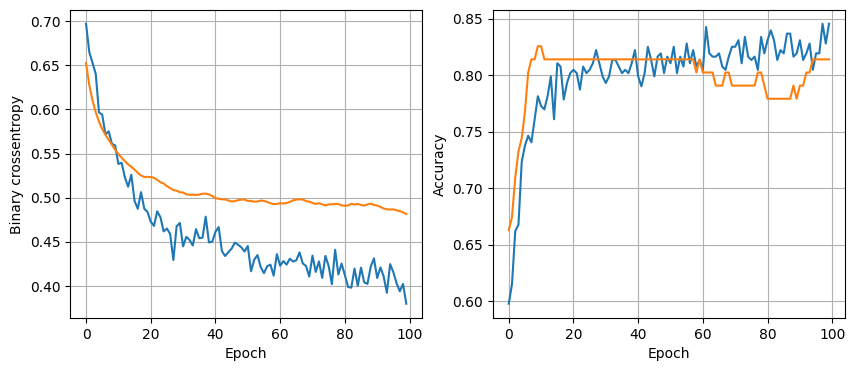

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5756 - loss: 111.2181 
32 nodes, dropout 0.2, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



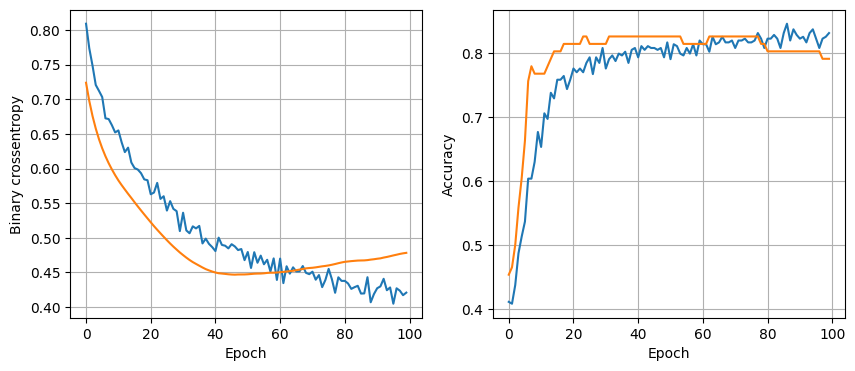

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5771 - loss: 98.0775 
64 nodes, dropout 0, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



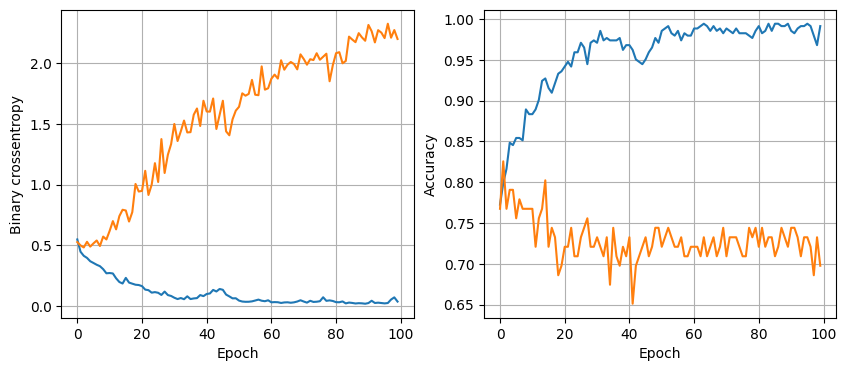

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4728 - loss: 6556.6143 
64 nodes, dropout 0, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



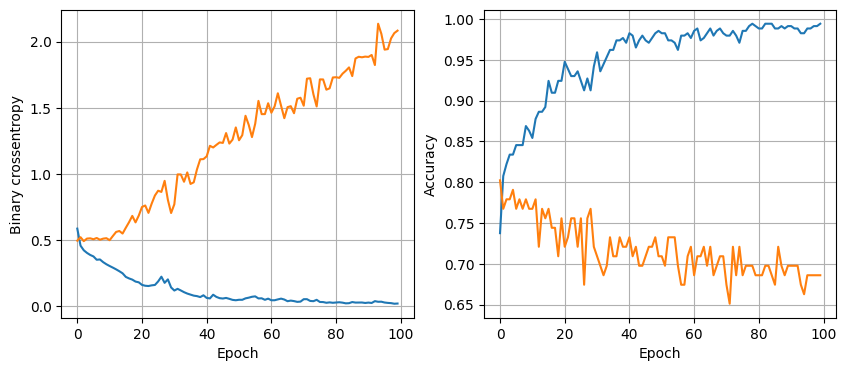

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5117 - loss: 3257.1536 
64 nodes, dropout 0, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



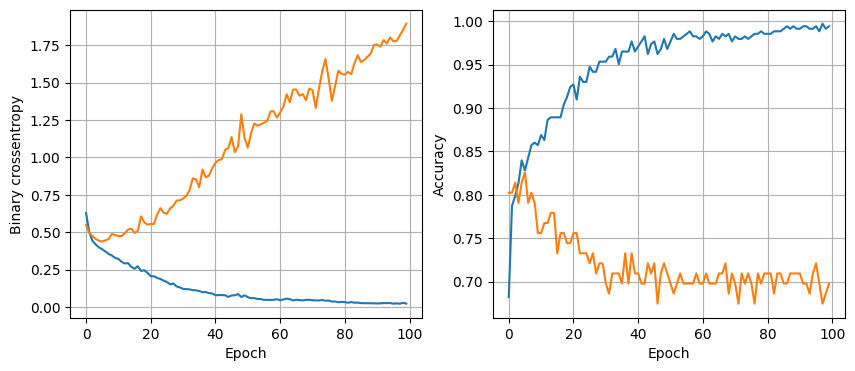

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3840 - loss: 2159.8157 
64 nodes, dropout 0, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



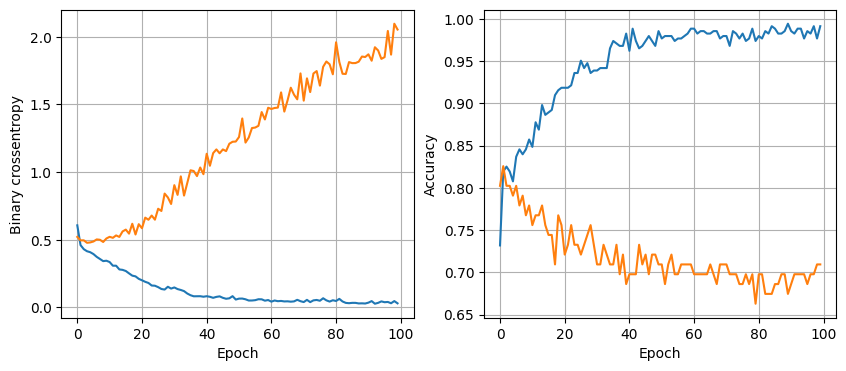

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 1945.7915 
64 nodes, dropout 0, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



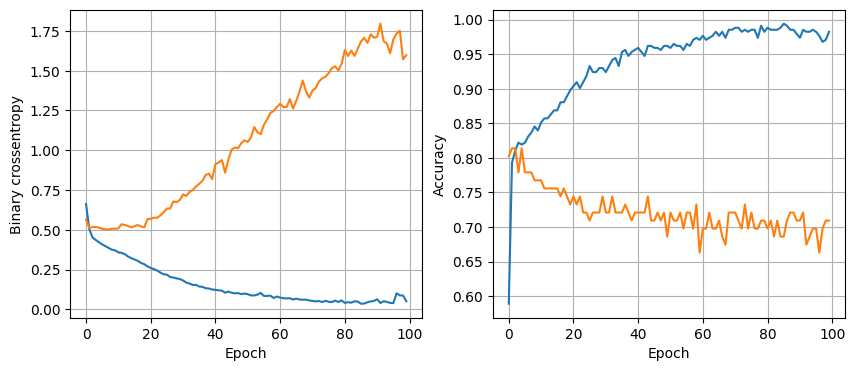

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4557 - loss: 1574.6541 
64 nodes, dropout 0, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



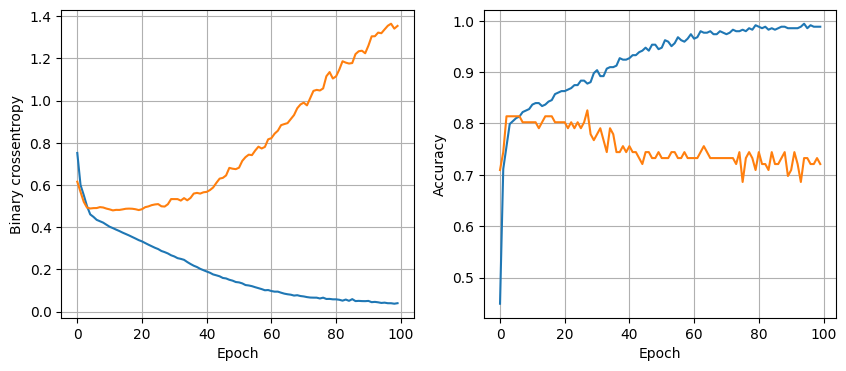

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4276 - loss: 803.1462 
64 nodes, dropout 0, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



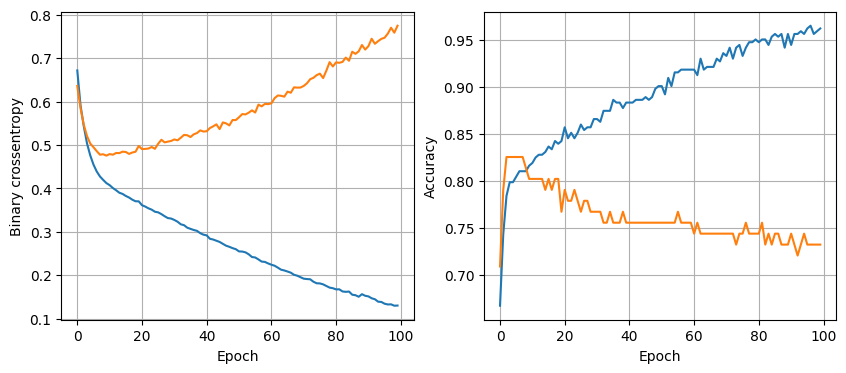

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3451 - loss: 2077.9646 
64 nodes, dropout 0, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



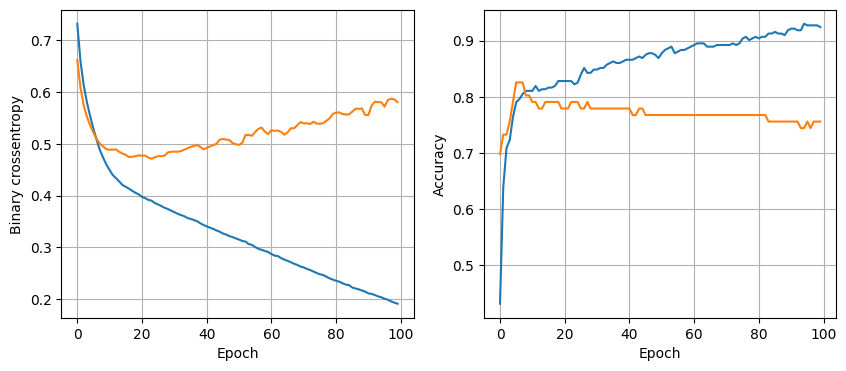

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1822.3289 
64 nodes, dropout 0, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



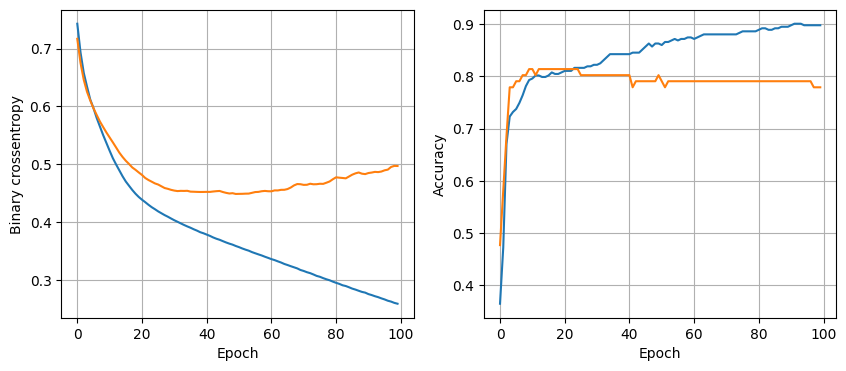

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1625.3418 
64 nodes, dropout 0.2, lr 0.01, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



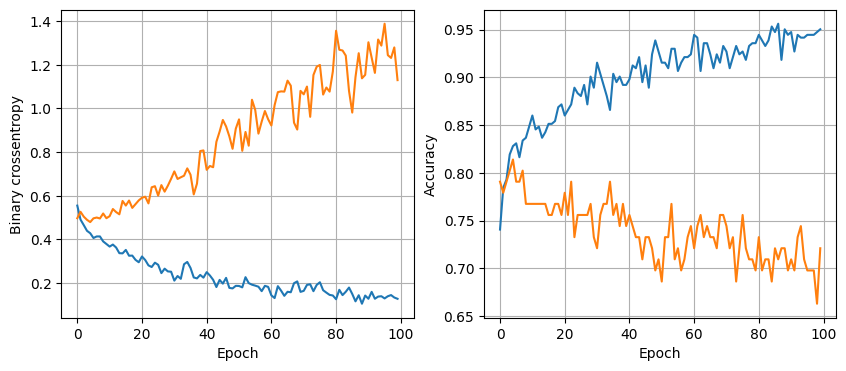

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5910 - loss: 669.0956  
64 nodes, dropout 0.2, lr 0.01, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



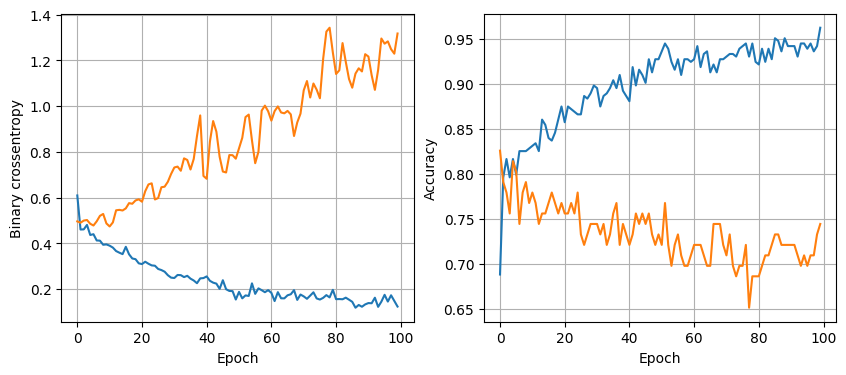

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5187 - loss: 1230.0089 
64 nodes, dropout 0.2, lr 0.01, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



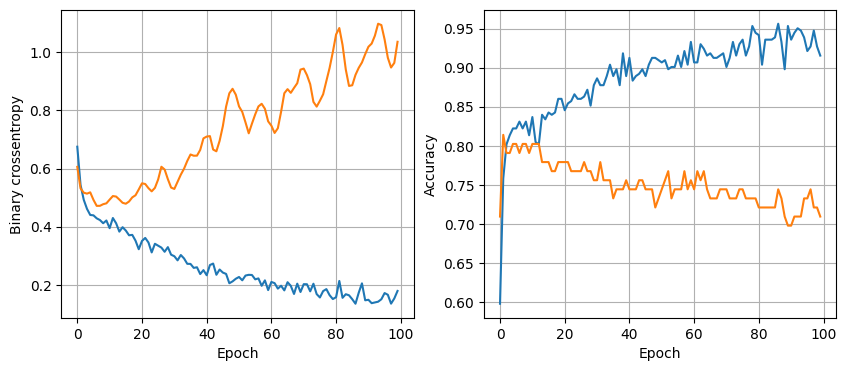

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 2554.3979 
64 nodes, dropout 0.2, lr 0.005, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



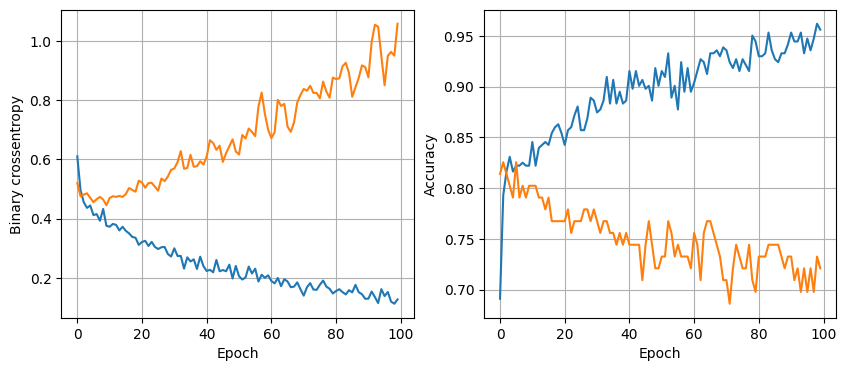

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 2426.0215 
64 nodes, dropout 0.2, lr 0.005, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



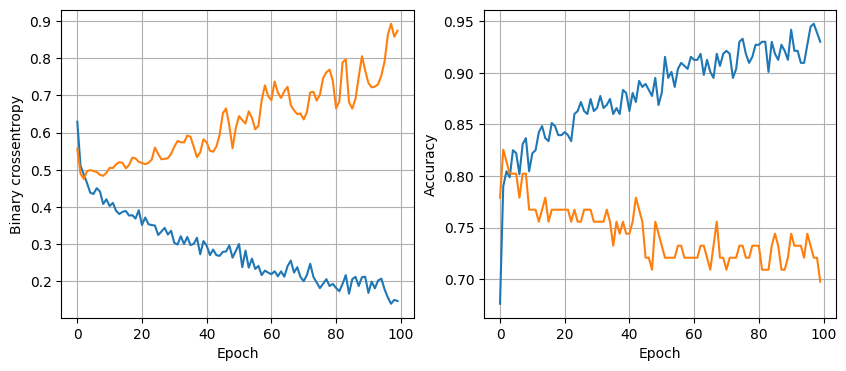

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.3770 - loss: 609.3460  
64 nodes, dropout 0.2, lr 0.005, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



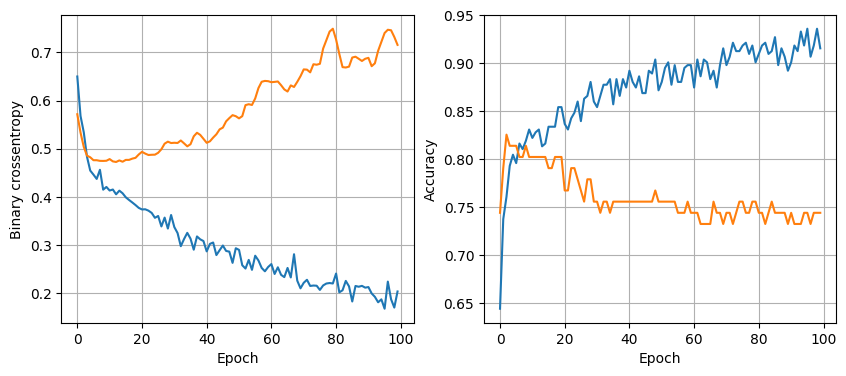

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4409 - loss: 760.2231 
64 nodes, dropout 0.2, lr 0.001, batch size 32


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



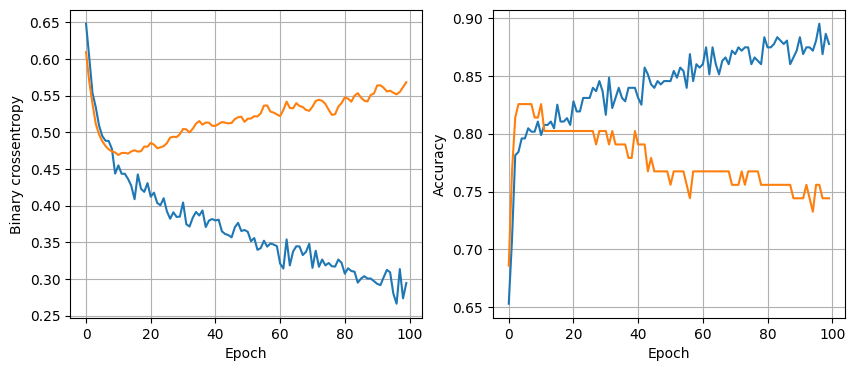

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5413 - loss: 375.8070 
64 nodes, dropout 0.2, lr 0.001, batch size 64


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



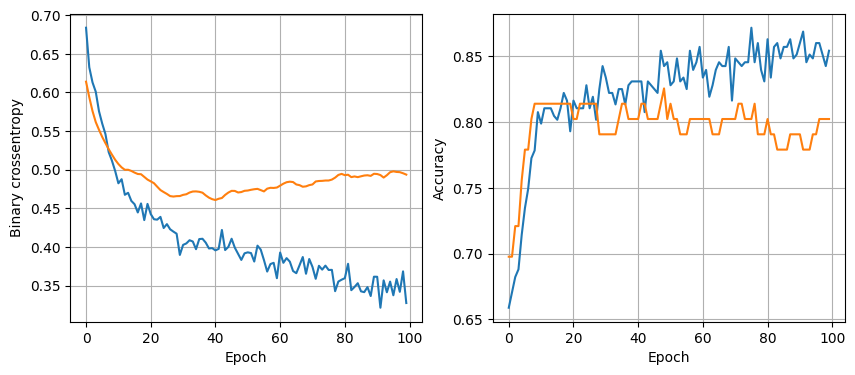

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3280 - loss: 1084.9307
64 nodes, dropout 0.2, lr 0.001, batch size 128


c:\Users\parsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



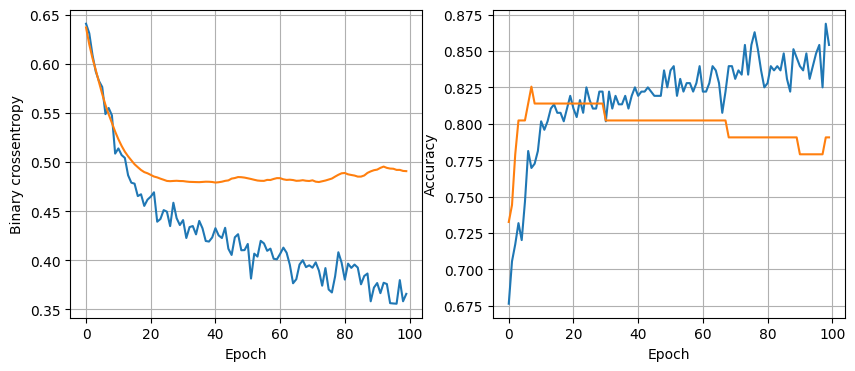

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4822 - loss: 286.5597 


In [53]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_val, y_val)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [54]:
y_predict = least_loss_model.predict(x_test)
y_predict = (y_pred > 0.5).astype(int).reshape(-1,)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.85      1.00      0.92        68

    accuracy                           0.87        93
   macro avg       0.93      0.76      0.80        93
weighted avg       0.89      0.87      0.86        93



In [56]:
accuracy7 = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy7:.3f}')
print(classification_report(y_test, y_predict))

Accuracy: 0.871
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.85      1.00      0.92        68

    accuracy                           0.87        93
   macro avg       0.93      0.76      0.80        93
weighted avg       0.89      0.87      0.86        93

